# Домашняя работа # 2

Всего баллов: 12 баллов (идет в ведомость максимум 11)

Импортируем библиотеки.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Будем работать с [данными](https://www.ssa.gov/oact/babynames/limits.html) о самых популярных именах детей, родившихся в США в 1880-2020 годах.

Пример файла и легенда:

In [2]:
example = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/babies%20names/yob1880.txt',
                      names = ['name', 'sex', 'number'])
example.head()

,name,sex,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Данные:

* `name` - имя
* `sex` - пол (мужское или женское)
* `number` - количество детей с таким именем

Т.е. последняя строчка в примере читается так:
"1746 девочек назвали Minnie"


## Задание 1 (2 балла)

**🔥 Если у вас не получилось сделать это задание, то в следующем задании можно загрузить готовый файл.**

**🔥🔥 Данное задание засчитывается полностью, если реализован предложенный алгоритм. Другие решения могут быть засчитаны частично.**

По ссылке скачайте архив с файлами для каждого года наблюдений (1880-2020). Распакуйте файлы в папку `data`. Это не нужно делать с помощью Pyhton!

Положите этот блокнот в папку вместе с данными. В вашей папке должен быть блокнот и папка `data` с распакованным архивом.

В первую очередь нам нужно собрать все файлы в один датасет.

* Импортируйте библиотеку `os` — это библиотека для работы с операционной системой. С ее помощью мы сможем получить список названий всех 140 файлов.
* создайте [пустой датафрейм pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) `babies` со следующими колонками: `'name', 'sex', 'number', 'year'`
* Если вы все сделали правильно с распаковкой файлов, то `sorted(os.listdir('data'))` даст вам список всех файлов в папке `data`, отсортированный от самого раннего года к самому позднему.
* Запустите цикл `for` по `sorted(os.listdir('data'))` — на каждой итерации во временну переменную будет сохраняться название файла. Для каждого названия файла сделайте следующее:

    * Проверьте, что в название файла входит строка `'yob'` (так мы защитимся от возможных ошибок, если в папке будут какие-то посторонние файлы, например, временные)
    * С помощью среза извлеките из названия файла год, превратите в целое число и сохраните в переменную `year`.
    * С помощью функции `pd.read_csv()` откройте файл как датафрейм и сохраните его в переменную с названием `temp`. Ваш путь к файлу должен начинаться с `'data/'`. Название файла можете приклеить к этой строке с помощью оператора `+`. В качестве дополнительного параметра укажите `names=['name', 'sex', 'number']`, чтобы добавить названия колонок.
    * В датафрейме `temp` создайте новую колонку `'year'` и запишите в нее год из переменной `year`. 
    * Таким образом мы получим датафрейм для, например, 1880-го года, в который мы к каждому наблюдению добавим значение года `1880` в новую колонку.
    * Теперь нам нужно с помощью метода датафрейма `.append()` добавить только считанный датафрейм `temp` в конец датафрейма `babies`. Вызовите метод от `babies` и передайте `temp` в качестве аргумента. Добавьте параметр `ignore_index=True`, чтобы индекс в итоговом датафрейме был сквозной. Не забудьте перезаписать объект `babies`! `.append()` не изменяет исходный объект.
    * Этот цикл будет работать не быстро. Давайте сделаем своеобразный 'progress bar', чтобы знать, что все хорошо. Сделайте проверку условия: если `year` кратен 10, то напечатай `<НАЗВАНИЕ ФАЙЛА> is done`. Т.е. Python будет нам выводить сообщение, когда обработан каждый 10-й файл, а мы не будем волноваться, что код долго работает.

In [4]:
import os 
babies = pd.DataFrame(columns=['name', 'sex', 'number', 'year'])
for fh in sorted(os.listdir('data')):
    if 'yob' in fh:
        year = int(fh[3:7])
        temp = pd.read_csv('data/' + fh, names=['name', 'sex', 'number'])
        temp['year'] = year
        babies = babies.append(temp, ignore_index=True)
        if year % 10 == 0:
            print(f'{fh} done')

yob1880.txt done
yob1890.txt done
yob1900.txt done
yob1910.txt done
yob1920.txt done
yob1930.txt done
yob1940.txt done
yob1950.txt done
yob1960.txt done
yob1970.txt done
yob1980.txt done
yob1990.txt done
yob2000.txt done
yob2010.txt done
yob2020.txt done


В итоге у вас должен получиться датафрейм `babies` размерности `(2020863, 4)`. Если все правильно, то следующая ячейка при запуске выдаст `True`

In [5]:
babies_to_check = pd.read_csv('https://github.com/rogovich/2022_POL_Data_Analysis_in_Python/blob/main/@HW/HW2/all_babies_1880_2020.csv?raw=true')
print(len(babies.compare(babies_to_check)) == 0)

True


А `.tail()` датафрейма будет выглядеть вот так

In [49]:
babies_to_check.tail()

,name,sex,number,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


In [6]:
babies.tail()

,name,sex,number,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


## Задание 2 (1 балл)
Исследуйте набор данных `babies`. Ответьте на вопросы, каждый вопрос 0.2 балла. Если в предыдущем задании у вас не получилось создать нужный датафрейм, то раскомментируйте код ниже и запустите его.

In [142]:
# babies = pd.read_csv('https://github.com/rogovich/2022_POL_Data_Analysis_in_Python/blob/main/@HW/HW2/all_babies_1880_2020.csv?raw=true')


1) Какие годы входят в наш набор данных? Напечатайте все уникальные значения.

In [7]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=object)

2) Какое имя в датасете находится по индексом 121? Выведите только имя.

In [8]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies.iloc[121]['name']

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[babies['name'] == 'Aaron']['number'].sum()

596354

4) Cколько мальчиков родилось в 2010?

In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[(babies['sex'] == 'M') & (babies['year'] == 2010)]['number'].sum()

1917177

5) Сколько в датасете девочек по имени John?

In [11]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[(babies['sex'] == 'F') & (babies['name'] == 'John')]['number'].sum()

21715

## Задание 3 (2.5 балла)

Каждый пункт 0.5 балла.

1. Отфильтруйте набор данных `babies` по полу, сгруппируйте по годам и для каждого года найдите суммарное количество рожденных детей. Сохраните результаты в два новых датафрейма: `babies_girls` и `babies_boys`. Т.е. должно получиться два датафрейма (девочки и мальчики), где каждому году соответствует общее количество детей, рожденных в этом году.
2. Создайте рисунок `matplotlib` с 3 графиками один под другим. Добавьте параметр `figsize=(7, 15)`. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек (фиолетовый цвет), второй - для мальчиков (зеленый цвет), третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). 
3. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны — 'год' и 'количество новорожденных (млн)'
4. Для шкалы y, показывающей количество детей, рожденных в этот год, должны быть установлены лимиты (0, 2.30e+06), чтобы она была одинакова на обоих графиках.
5. В новой ячейке markdown под графиками напишите краткий вывод, отличаются ли тренды рождаемости для мальчиков и девочек.

In [12]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies_girls = babies[babies['sex'] == 'F'].groupby('year')['number'].sum()
babies_boys = babies[babies['sex'] == 'M'].groupby('year')['number'].sum()

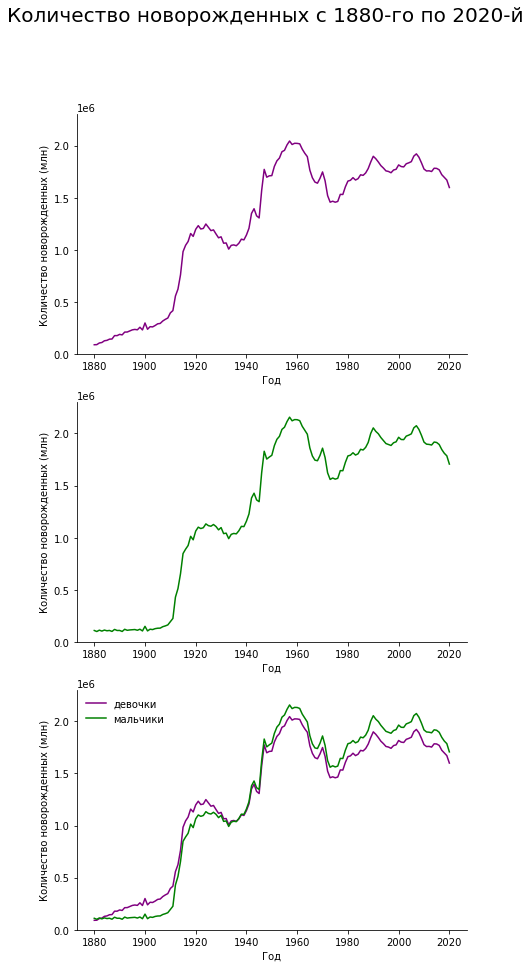

In [20]:
fig, ax = plt.subplots(3,1, figsize=(7, 15))
ax[0].plot(babies_girls, c='purple')
ax[1].plot(babies_boys, c='green')
ax[2].plot(babies_girls, c='purple')
ax[2].plot(babies_boys, c='green')
ax[2].legend(['девочки', 'мальчики'], frameon=False)

for axis in ax:
    axis.set_ylim(0,2.30e+06)
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.set_xlabel('Год')
    axis.set_ylabel('Количество новорожденных (млн)')
    
fig.suptitle('Количество новорожденных с 1880-го по 2020-й', fontsize = 20)
plt.show()

**Вывод**: как и ожидалось, глобально тренды совпадают, мы видим участки, на которых зарегистрированно больше новорожденных мальчиков, но также и участки, на которых зарегистрированно больше новорожденных девочек.

## Задание 4 (2.5 балла)

Каждый пункт 0.5 балла

1. В оригинальном датафрейме `babies` создайте новую колонку - первая буква имени `first_letter`.
2. Выберете год из датасета. Сгруппируйте датасет так, чтобы его индексом были первые буквы, а колонкой - количество детей, роженных в этот год, с именами, начиающимися на эти буквы. Сохраните два новых датафрейма для 1880 и 2020 года (например, `babies_first_1880`).
3. Создайте рисунок `matplotlib` с 2 графиками один под другим. Добавьте параметр `figsize=(7, 10)`. Постройте столбчатую диаграмму для каждого года в отдельном графике.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. В новой ячейке markdown под графиками кратко опишите как изменились тренды в именах, если смотреть на первые буквы.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [21]:
babies['first_letter'] = babies['name'].apply(lambda x: x[0])

In [22]:
babies_first_1880 = babies[babies['year'] == 1880].groupby('first_letter')['number'].sum()
babies_first_2020 = babies[babies['year'] == 2020].groupby('first_letter')['number'].sum()

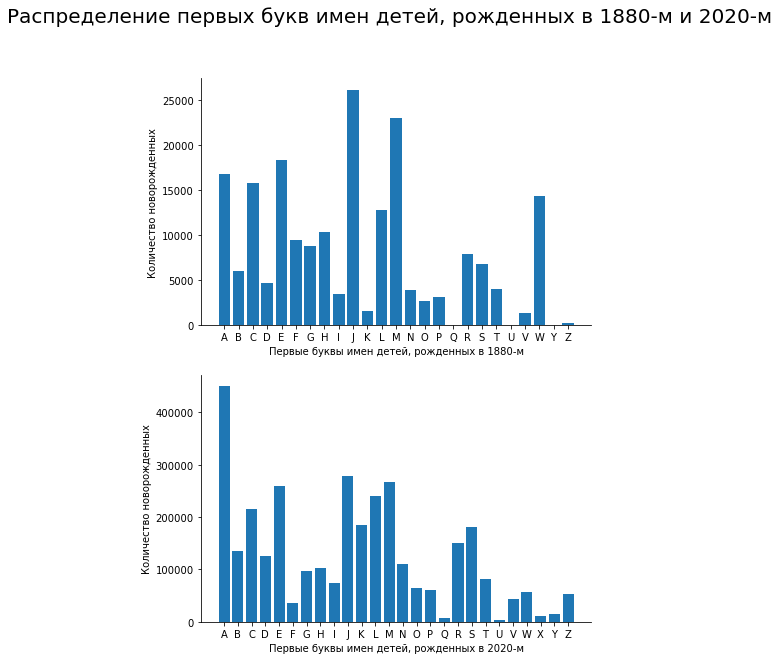

In [28]:
fig, ax = plt.subplots(2,1, figsize=(7, 10))
ax[0].bar(babies_first_1880.index, babies_first_1880)
ax[0].set_xlabel('Первые буквы имен детей, рожденных в 1880-м')

ax[1].bar(babies_first_2020.index, babies_first_2020)
ax[1].set_xlabel('Первые буквы имен детей, рожденных в 2020-м')

for axis in ax:
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.set_ylabel('Количество новорожденных')
    
fig.suptitle('Распределение первых букв имен детей, рожденных в 1880-м и 2020-м', fontsize = 20)
plt.show()

**Вывод**: мы видим, что моды распределения стали другими в 2020-м году. Возможно это связано с тем, что есть  какие-то самые популярные имена и именно их стали реже использовать, а не то, что появился ряд популярных имен, начинающих на определенные буквы. Также интересно, что "редкие буквы" (например, Q, X, Y и т.д.) стали гораздо чаще встречаться в 21-м веке.

## Задание 5 (4 балла)

Каждый пункт 0.8 балла

1. Создайте пустой список `popular_names`. Найдите самые полулярные женские и мужские имена в 1880 году и 2020 году (всего 4 имени) и добавьте из в список `popular_names`.
2. Создайте рисунок matplotlib с одним горизонтальным графиком, размер установите (10, 5). В одной оси координат постройте линейный графики для каждого популярного за все время (это можно сделать в цикле со списком `popular_names`). На каждом шаге цикла сгруппируйте отфильтрованный датасет для этого имени по году и найдите общество количество новорожденных и постройте график для этих данных. 
3. Верхняя и правая границы графика должны быть невидимы, каждый график быть с заголовком, шкалы графика должны быть подписаны, у графика должна быть легенда (передайте методу `.legend()` `popular_names` в качестве параметра. Для каждого из графиков выберите нестандартный цвет в палитре hex-color.
4. Адаптируйте и добавьте код к вашему графику, чтобы каждые 20 лет начиная с 1880-го года по 2020-й были отмечены тонкой серой линией (тут вам поможет range() c шагом. 

```
for year in [1880, 1890]:
    ax.axvline(x=year, color='blue', lw=0.25)
```
5. В новой ячейке markdown под графиками кратко опишите как тренды четырех имен.

In [58]:
popular_names = []

years = [1880, 2020]
for year in years:
    baby_filtered = babies[babies['year'] == year]
    f = baby_filtered[babies['sex'] == 'F'].sort_values(by='number', ascending=False).head(1)['name'].values[0]
    m = baby_filtered[babies['sex'] == 'M'].sort_values(by='number', ascending=False).head(1)['name'].values[0]
    popular_names.extend([f,m])
    
print(popular_names)

<ipython-input-58-2405e13d574a>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = baby_filtered[babies['sex'] == 'F'].sort_values(by='number', ascending=False).head(1)['name'].values[0]
<ipython-input-58-2405e13d574a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m = baby_filtered[babies['sex'] == 'M'].sort_values(by='number', ascending=False).head(1)['name'].values[0]


['Mary', 'John', 'Olivia', 'Liam']


Text(0.5, 0.98, 'Количество новорожденных с 1880-го по 2020-й')

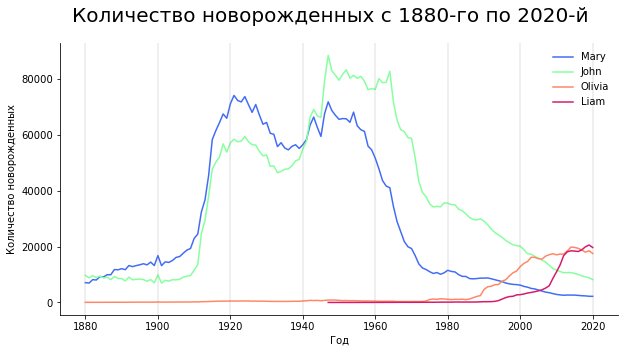

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))

for name, color in zip(popular_names, ['#426cf5', '#87ff9f', '#ff8766', '#d61a6b']):
    temp = babies[babies['name'] == name].groupby('year')['number'].sum()
    ax.plot(temp, c=color)
    
for year in range(1880, 2021,20):
    ax.axvline(x=year, color='grey', lw=0.25)
    
ax.legend(popular_names, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Год')
ax.set_ylabel('Количество новорожденных')

fig.suptitle('Количество новорожденных с 1880-го по 2020-й', fontsize = 20)

**Вывод**: Мы видим, что "традиционные" имена Мэри и Джон довольно долго удерживают позиции, но где-то в 1960-х годах начинается спад, который продолжается до сих. Подъем самых популярных имен в 2020-м году — Оливия и Лиам — начался где-то в 1990-х, но Лиамам удалось обойти Джонов по популярности только в 2010-х.